# Pokimane Youtube Statistical Analysis

In [3]:
import json
import pandas as pd

file = "pokimane.json"
data = None

# Open file in read only mode with the alias of f
# Load f as valid json and set it equal to local variable data for analysis
with open(file, 'r') as f:
    data = json.load(f)

# Pops first two results from dictionary and sets them equal to their assigned variables respectively
# channel_id is simply the channel id
# stats includes all subsequent data
channel_id, stats = data.popitem()

# Separate data by section
# Create variables to hold channal statistics and video statistics
channel_stats = stats['channel_statistics']
video_stats = stats['video_data']

In [4]:
# Channel statistics

print('views:', channel_stats['viewCount'])
print('subscribers:', channel_stats['subscriberCount'])
print('videos:', channel_stats['videoCount'])

views: 485996149
subscribers: 5690000
videos: 457


In [5]:
# Video statistics

# Sort videos from highest viewcount to lowest
# Use built in sorted() function which will sort the video_stats object
# video_stats.items() returns a tuple where the first value is the key and second value is the item - first part is video id and second is object
# Provide a key that is a lambda function
# Lambda converts the viewCount value to an int
# Set reverse to true as it sorts from lowest to highest by default
sorted_vids = sorted(video_stats.items(), key = lambda item: int(item[1]['viewCount']), reverse = True)
stats = []
for vid in sorted_vids:
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # Comments throws key error if .get() is not used
    # Comments turned off for these videos. Set to 0 since no other vids have 0 comments.
    comments = int(vid[1].get('commentCount', 0))
    stats.append([title, views, likes, dislikes, comments])

In [6]:
df = pd.DataFrame(stats, columns = ['title', 'views', 'likes', 'dislikes', 'comments'])

# How to verify the existence of None in the comments column is coded below
# Several videos have comments turned off which could be useful for our analysis
# disabled_comments = df.loc[df['comments'] == 0]
# print(disabled_comments)

print(df.head(10))

                                               title     views   likes  \
0  I CAN'T BELIEVE I AGREED TO THIS!! FORTNITE BA...  14460903  223275   
1  8 YR OLD gets CHEATED on by Fortnite Girlfrien...  12937392  262340   
2    TSM MYTH TEACHES POKI A LESSON?! FORTNITE DUOS!   9947291  139446   
3  HE KEEPS CALLING ME WHAT?! FORTNITE DUO W/ TSM...   9631477  138201   
4  My Poki Emote is Everywhere and I’m FREAKING O...   9259854  190645   
5  POKI REUNITES WITH A 12 YR OLD AFTER 4 YEARS! ...   8057998  177853   
6  Pokimane Reacts to NEW Fortnite Season 9 + Bat...   7987114  156028   
7                            POKI VS FAKER MID LANE!   7788122   84249   
8      How Much Does Pokimane Make? I Google Myself!   7274948  265873   
9    FORTNITE MADE ME AN EMOTE - New Pokimane Dance!   6682491  188418   

   dislikes  comments  
0     14788     14336  
1      5819     15927  
2      3312     11547  
3      4293     10182  
4      4440     10994  
5      3701     16293  
6      6516     1

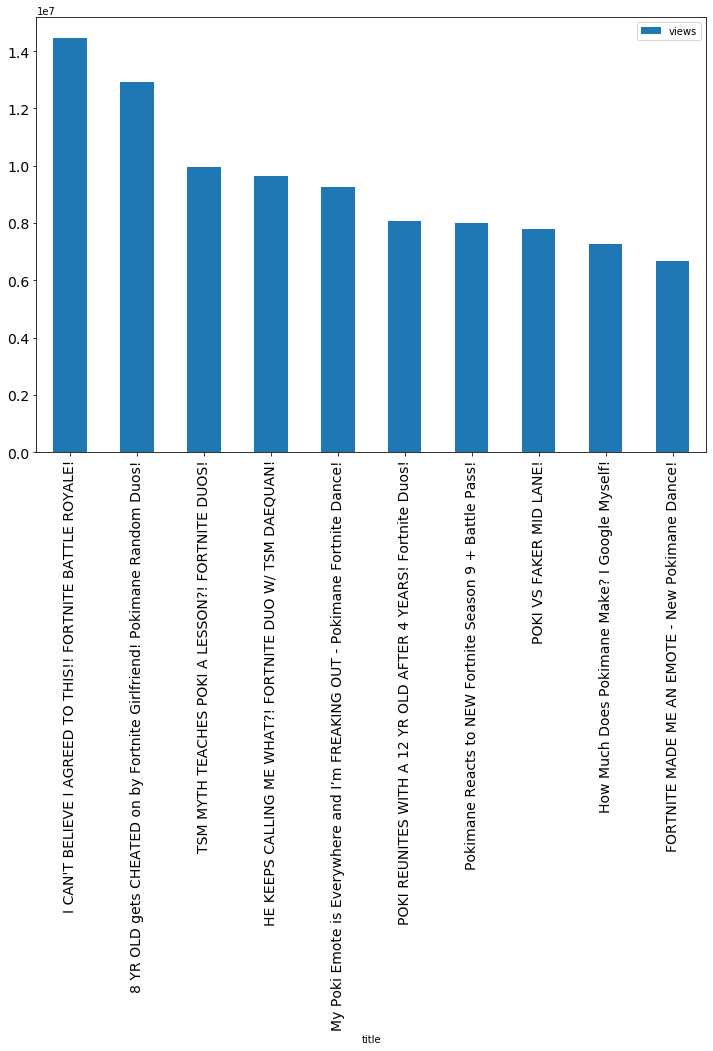

In [7]:
top10 = df.head(10)
ax = top10.plot.bar(x = 'title', y = 'views', figsize = (12,8), fontsize = 14)

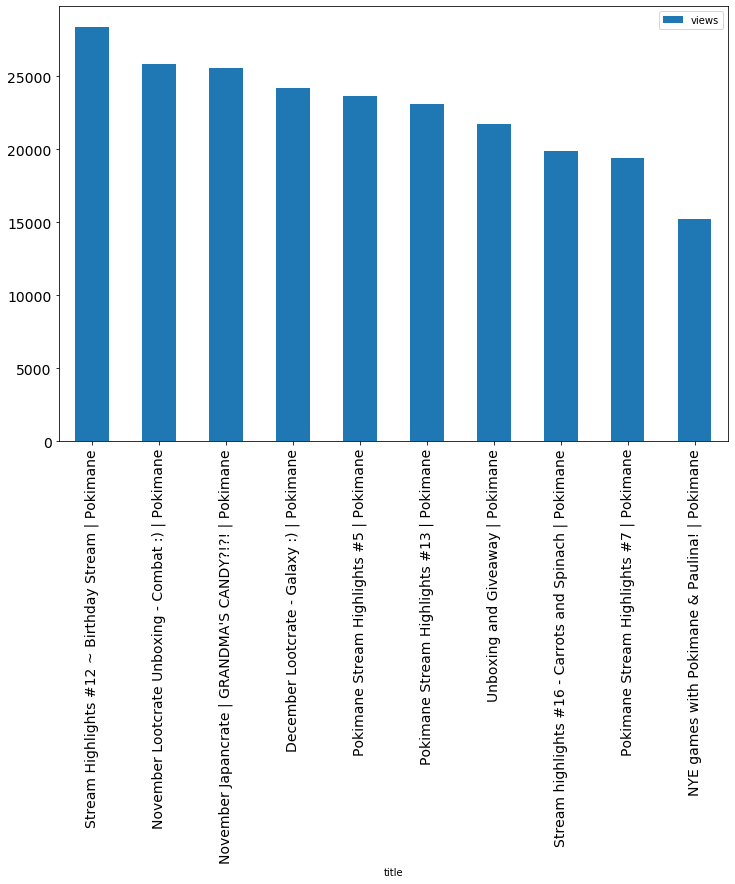

In [8]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x = 'title', y = 'views', figsize = (12,8), fontsize = 14)

In [9]:
# likes vs dislikes
likes_avg = top10['likes'].mean()
dislikes_avg = top10['dislikes'].mean()
comments_avg = top10['comments'].mean()
print('Top 10')
print('average likes:', likes_avg)
print('average dislikes:', likes_avg)
print('average comments:', likes_avg)

likes_avg = bottom10['likes'].mean()
dislikes_avg = bottom10['dislikes'].mean()
comments_avg = bottom10['comments'].mean()
print('Bottom 10')
print('average likes:', likes_avg)
print('average dislikes:', likes_avg)
print('average comments:', likes_avg)

Top 10
average likes: 182632.8
average dislikes: 182632.8
average comments: 182632.8
Bottom 10
average likes: 562.6
average dislikes: 562.6
average comments: 562.6


In [10]:
# Import json file
file = 'video_comments.json'
with open (file, 'r') as f:
    comment_data = json.load(f)

# Retrieve top level comment data for analysis
retrieved_comment_data = []
comment_dict = dict()

# Loop through data to get an object that only contains comment ids and their associated data
# We need to moved own one level in the dictionary
for video in comment_data:
    for comment_id in comment_data[video]:
        comment_dict.update({comment_id : comment_data[video][comment_id]})

# Get the items of our newly formatted data
comment_data = comment_dict.items()

# Loop through the items to get the values that we need for our data frame
for comment in comment_data:
    # NOTE: We are looping through a list of key value pairs
    # Index 0 contains the comment ID and index 1 contains the comment data that we need
    # We can exclude the comment ID as we do not need it for analysis    
    snippet = comment[1]['snippet']['topLevelComment']['snippet']
    video_id = snippet['videoId']
    top_level_comment_text = snippet['textDisplay']
    top_level_comment_author = snippet['authorDisplayName']
    top_level_comment_likes = int(snippet['likeCount'])
    top_level_comment_date = snippet['publishedAt']
    retrieved_comment_data.append([video_id, top_level_comment_text, top_level_comment_author, top_level_comment_likes, top_level_comment_date])

# Create a dataframe from retrieved comment data
comment_df = pd.DataFrame(retrieved_comment_data, columns = ['Video ID', 'Comment', 'Author', 'Likes', 'Publish Date'])
print(comment_df.head(5))

      Video ID                                            Comment  \
0  djj91ZeTBnM  <a href="https://www.youtube.com/watch?v=djj91...   
1  djj91ZeTBnM                           I play among us everyday   
2  djj91ZeTBnM  Lemme guess people in the chat when she gets u...   
3  djj91ZeTBnM  so poki always get saved by sykkuno&#39;s doub...   
4  djj91ZeTBnM  nice vid i just uploaded my first amoung us vi...   

             Author  Likes          Publish Date  
0   Ariel Marcasote      0  2020-10-04T08:46:26Z  
1   Kaltrina Ibroci      0  2020-10-04T08:43:22Z  
2        Prince V&G      1  2020-10-04T08:41:51Z  
3  neries hernandez      0  2020-10-04T08:37:24Z  
4           santino      0  2020-10-04T08:33:58Z  


In [11]:
# Count the ammount of comments for each video

comment_count_df = comment_df.groupby(['Video ID']).size().reset_index(name='count')
print(comment_count_df)

        Video ID  count
0    -BZlVb177yc    671
1    -TQWJr13juY    462
2    -WBQAGjgtJs   5895
3    00YSBa6T5_g    269
4    0NS-Fr84XW8    442
..           ...    ...
392  zW24wWbh0KI   1314
393  zjAq_d8Rdpo    618
394  zk_FUBTD8GQ   1949
395  zlMVZI-0-oU  17481
396  zrlGRKZCgis    309

[397 rows x 2 columns]


In [12]:
# Sort data frame by the amount of comments on each video
sorted_comment_df = comment_count_df.sort_values(by=['count'])

highest_20 = sorted_comment_df.tail(20)
print(highest_20)

        Video ID  count
64   9KiwxF3bBeQ   8339
299  k7u_zGH5QFs   8458
255  e3A8-cCZwNk   8523
377  wtXqjh8VkTo   9133
129  Mt8kT0MNmpY   9198
159  RWpIea15Y_w   9317
221  Zt9DYPYFE8I   9441
156  QJ17wpE9eNc   9460
69   AkWnT0tfnTU   9785
359  v21lD2vPRvc   9872
189  Vq1XkpvNXk0  10807
15   2AQrjLjtScY  10923
149  OwNyBXGxP6g  11975
179  UcgSbvdKag8  13224
326  r5AU0JJ2wlA  14519
286  iLFpZSO5d2A  15129
277  gpwNh9mIfz8  16568
81   ETBUJkVMnpc  16877
395  zlMVZI-0-oU  17481
138  NuExff4-ty4  53454


### Videos Sorted by Comment Count

This is a chart that represents the top 20 videos by comment count. They are in the following order from highest to lowest:
1. [my overdue apology.](https://www.youtube.com/watch?v=NuExff4-ty4)
2. [Is Pokimane Asian? I take a DNA test!](https://www.youtube.com/watch?v=zlMVZI-0-oU)
3. [How Much Does Pokimane Make? I Google Myself!](https://www.youtube.com/watch?v=gpwNh9mIfz8)
4. [HE MADE ME A POKIMANE FORTNITE SKIN!](https://www.youtube.com/watch?v=ETBUJkVMnpc)
5. [My Response To The Copystrike Allegations / PewDiePie / Dark Side Of Pokimane](https://www.youtube.com/watch?v=r5AU0JJ2wlA)
6. [12 YR OLD has ASTHMA ATTACK meeting Pokimane in Fortnite Random Duos!](https://www.youtube.com/watch?v=iLFpZSO5d2A)
7. [8 YR OLD gets CHEATED on by Fortnite Girlfriend! Pokimane Random Duos!](https://www.youtube.com/watch?v=UcgSbvdKag8)
8. [Pokimane's 2020 ROOM TOUR + Big Announcements!](https://www.youtube.com/watch?v=OwNyBXGxP6g)
9. [Pokimane's Dark Secrets REVEALED! \$10,000 Room Tour 2019!](https://www.youtube.com/watch?v=2AQrjLjtScY)
10. [POKI REUNITES WITH A 12 YR OLD AFTER 4 YEARS! Fortnite Duos!](https://www.youtube.com/watch?v=Vq1XkpvNXk0)
11. [I DO WHAT FOR \$5000?! POKI REACTS TO MEAN COMMENTS + 1 MILLION SUBS!](https://www.youtube.com/watch?v=v21lD2vPRvc)
12. [I CAN'T BELIEVE I AGREED TO THIS!! FORTNITE BATTLE ROYALE!](https://www.youtube.com/watch?v=AkWnT0tfnTU)
13. [FORTNITE MADE ME AN EMOTE - New Pokimane Dance!](https://www.youtube.com/watch?v=QJ17wpE9eNc)
14. [TSM MYTH TEACHES POKI A LESSON?! FORTNITE DUOS!](https://www.youtube.com/watch?v=Mt8kT0MNmpY)
15. [My Poki Emote is Everywhere and I’m FREAKING OUT - Pokimane Fortnite Dance!](https://www.youtube.com/watch?v=RWpIea15Y_w)
16. [Pokimane Reacts to NEW Fortnite Season 9 + Battle Pass!](https://www.youtube.com/watch?v=wtXqjh8VkTo)
17. [A Day in the Life of a Twitch Streamer | Pokimane](https://www.youtube.com/watch?v=e3A8-cCZwNk)
18. [Pokimane Reacts to NEW Fortnite SEASON 3 + Battle Pass!](https://www.youtube.com/watch?v=9KiwxF3bBeQ)
19. [HE KEEPS CALLING ME WHAT?! FORTNITE DUO W/ TSM DAEQUAN!](https://www.youtube.com/watch?v=HFtHCnzhOTc)
20. [Answering Very Personal Questions | 5 Million Subscriber Q&A Special!](https://www.youtube.com/watch?v=k7u_zGH5QFs)

The chart below uses video IDs for the x-axis to provide clear and unique identifiers. Links to all videos are provided above, however you may also view individual videos by visiting the url youtube.com/watch?v= followed by the video id.

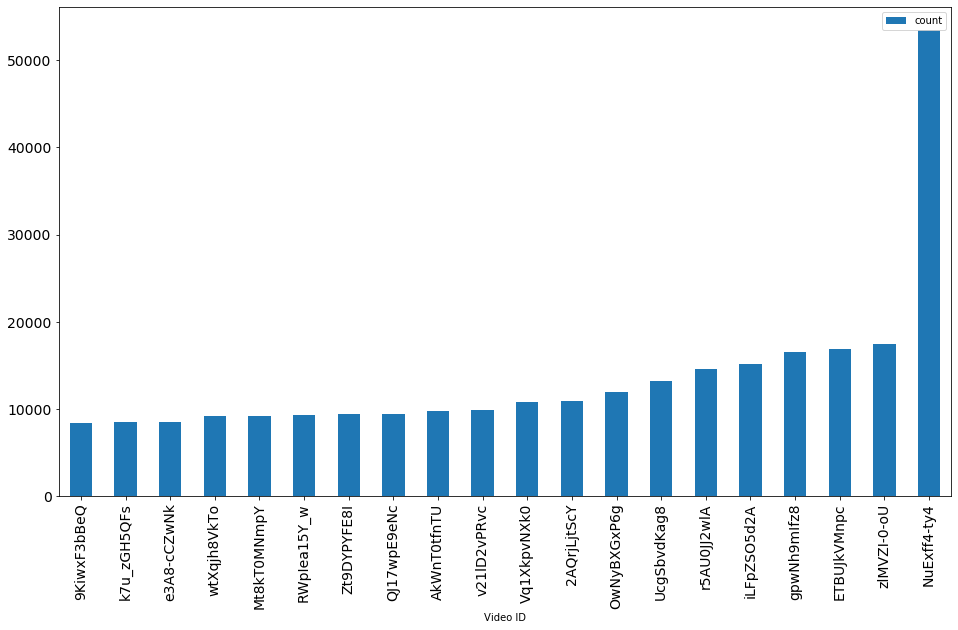

In [13]:
# Plot video counts

ax = highest_20.plot.bar(x = 'Video ID', y = 'count', figsize = (16,9), fontsize = 14)

### Sentiment Analysis

#### Sentiment Analysis Brief Overview

This form of sentiment analysis takes in a string and codes it on a scale from -1 to 1. Negativity is indicated by -1, neutrality is indicated by 0, and positivity is indicated by 1. These scores are not relative to one another, but instead to the scoring criteria of the TextBlob package. This means that we can reasonably denote that the sentiment scores of these comments are relative to social sentiment in general.

Note: Only top level comments were used for this analysis due to time constraints. Further analysis can be and should be done on replies as well as comment likes.

In [14]:
from textblob import TextBlob
# Loop through data on video id NuExff4-ty4 to create text blobs for sentiment analysis

# Import json file
file = 'video_comments.json'
with open (file, 'r') as f:
    comment_data = json.load(f)

# Retrieve top level comment data for analysis
sentiment_data = []
comment_dict = dict()

# Loop through data to get an object that only contains comment ids and their associated data
# We need to moved own one level in the dictionary
apology_video = comment_data['NuExff4-ty4']
for comment_id in apology_video:
    comment_dict.update({comment_id : apology_video[comment_id]})
    
comment_data = comment_dict.items()
    
for comment in comment_data:
    comment_id = comment[0]
    text_display = comment[1]['snippet']['topLevelComment']['snippet']['textDisplay']
    # Use TextBlob to perform sentiment analysis    
    obj = TextBlob(text_display)
    # Returns value between -1 to 1 indicating sentiment
    sentiment = obj.sentiment.polarity
    sentiment_data.append([comment_id, sentiment])

# Create new data frame for sentiment data
sentiment_df = pd.DataFrame(sentiment_data, columns=['Comment ID', 'Sentiment Score'])

print(sentiment_df.head(10))

                   Comment ID  Sentiment Score
0  UgzQX_5wnF7ECsBpU0p4AaABAg         0.622222
1  UgwJAl1McMAdX9xRrsd4AaABAg         0.800000
2  UgyCrbzv3p_XxsBri-14AaABAg         0.000000
3  Ugz3ONYdYjAIGebIua94AaABAg         0.000000
4  UgxqS9sSaHpQL4D-kKN4AaABAg         0.000000
5  UgxEorqZORPFhyxb43V4AaABAg         0.000000
6  Ugygx3AgoQ-vqFkiWcZ4AaABAg        -0.493750
7  UgxaO4NLINHQBxUwiwF4AaABAg         0.250000
8  Ugz52a9qj559NqEdUad4AaABAg         0.000000
9  UgxsaB1-n0q6Kk6K_uR4AaABAg         0.000000


#### Sentiment Mean

In [15]:
# Get mean of sentiment on video NuExff4-ty4

average_sentiment = sentiment_df.mean()
print(average_sentiment)

Sentiment Score    0.04939
dtype: float64


Overall sentiment for Pokimane's most recent apology video is overall positive. Despite the negative attention that she has been recieving on the platform following the contrversy with ItsAGundam, her apology was recived in a positive light according to this analysis. Because a mean was taken to arrive at this conclusion, either of two scenarios are possible:
1. People generally carry a neutral sentiment when it comes to her apology
2. The audience of this video was extremely polarized in nearly equal parts, giving the appearance of neutrality

Let's deliniate which of these scenarios is most plausible with further analysis.

#### Plotting Sentiment Score Distribution

To evaluate whether the audience's sentiment was neutral versus polarized, we must take a closer look at the distribution of sentiment scores. To do so, we will re-format our data frame to provide us with a count for each unique sentiment score. We will subsequently sort that data frame by count from highest to lowest. Finally we will plot our results for the top 20 scores based on the amount of times comments fell into that particular score.

In [16]:
sorted_sentiment_scores = sentiment_df.groupby(['Sentiment Score']).size().reset_index(name='count')
print(sorted_sentiment_scores)

      Sentiment Score  count
0           -1.000000    231
1           -1.000000      3
2           -0.976562      6
3           -0.975000      4
4           -0.937500      1
...               ...    ...
4123         0.937500      6
4124         0.937500      1
4125         0.953674      1
4126         0.976562      8
4127         1.000000    424

[4128 rows x 2 columns]


In [17]:
sorted_sentiment_count = sorted_sentiment_scores.sort_values(by=['count', 'Sentiment Score'], ascending=False)
top_20_scores = sorted_sentiment_count.head(20)
print(top_20_scores)

      Sentiment Score  count
1811         0.000000  26389
3967         0.500000   2630
127         -0.500000   1411
3188         0.200000   1120
4109         0.800000    896
4041         0.600000    817
3421         0.250000    715
685         -0.200000    667
3825         0.400000    459
2628         0.100000    455
4127         1.000000    424
523         -0.250000    419
3722         0.350000    395
4082         0.700000    392
229         -0.400000    387
3592         0.300000    341
17          -0.800000    302
34          -0.700000    254
853         -0.155556    251
977         -0.125000    242


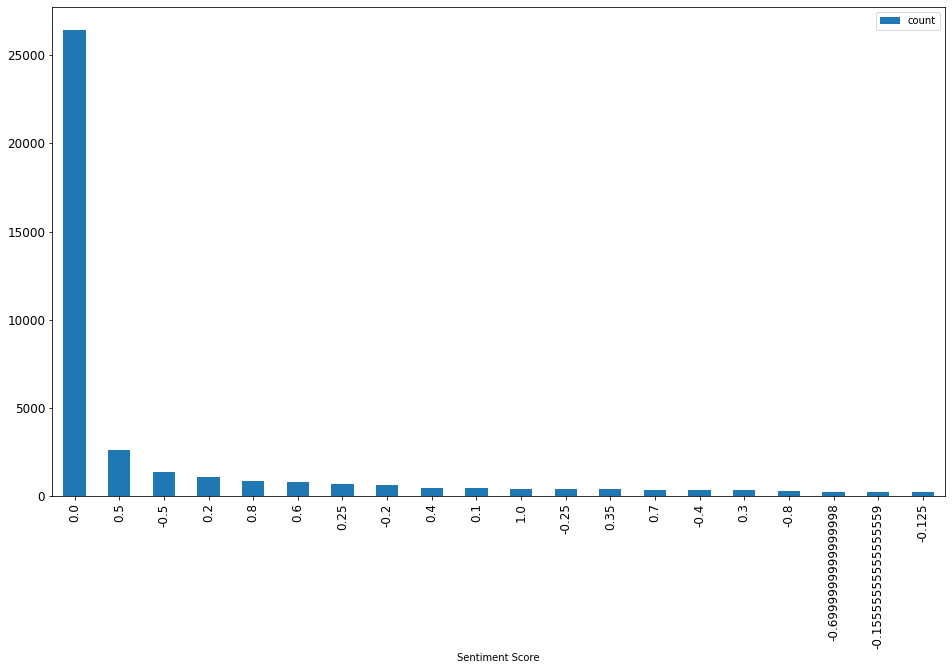

In [18]:
# Plot top 20 sentiment scores by count

ax = top_20_scores.plot.bar(x = 'Sentiment Score', y = 'count', figsize = (16,9), fontsize = 12)

Our plot reveals that the sentiment scores of the data are heavily skewed towards neutrality. 0.0 on the sentiment analysis scale (from -1 to 1) is the most prevalent score within the top level comments for this video by a vast margin. The most positive (1) and most negative (-1) scores are dwarved in comparison to the count of this neutral score.

Note: Further analysis on the statistical distribution of these scores can be done by modeling the data, however such analysis was not completed due to time constraints. This analysis is the bare minimum required to unerstand the general sentiment of the comments and it will suffice for our use case.

## Conclusion